# CIFAR-10 - Keras

In the excersises below, we will model a classification task with the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset using [Keras](https://keras.io/).

We will start out with a simle solution and progressively improve upon it.

## 1. Loading the dataset

In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Examining the dataset

In [2]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

For each image there is a corresponding label, which is a class index.

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


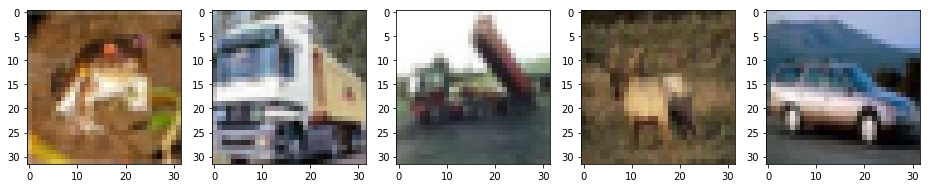

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

#### Preparing the dataset

First we are going to use a Multilayer Perceptron to classify our images. 

Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples.
We also need to vectorize the images, since the MLP will take a 3072-dimensional vector as the input.
When working with images, a simple way to normalize our data is to fit it within the 0 to 1 range.

In [4]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

## 2. MLP classifier

The MLPs are capable of modelling complex classification problems which are typically not linearly separable.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the MLP

Let's train our model now! We will store the training loss values and metrics in a history object, so we can visualize the training process later.

We are going to train the model for 15 epochs, using a batch size of 32 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples (in practice however it is advised to separate the validation data from the training data altogether).  

In [6]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 12s - loss: 1.8255 - acc: 0.3392 - val_loss: 1.7151 - val_acc: 0.3827
Epoch 2/15
 - 6s - loss: 1.6590 - acc: 0.4037 - val_loss: 1.6680 - val_acc: 0.4020
Epoch 3/15
 - 6s - loss: 1.5852 - acc: 0.4316 - val_loss: 1.6836 - val_acc: 0.3971
Epoch 4/15
 - 6s - loss: 1.5380 - acc: 0.4473 - val_loss: 1.5602 - val_acc: 0.4451
Epoch 5/15
 - 6s - loss: 1.5022 - acc: 0.4574 - val_loss: 1.5634 - val_acc: 0.4448
Epoch 6/15
 - 6s - loss: 1.4718 - acc: 0.4711 - val_loss: 1.5091 - val_acc: 0.4652
Epoch 7/15
 - 6s - loss: 1.4491 - acc: 0.4784 - val_loss: 1.5372 - val_acc: 0.4493
Epoch 8/15
 - 6s - loss: 1.4199 - acc: 0.4924 - val_loss: 1.4981 - val_acc: 0.4669
Epoch 9/15
 - 6s - loss: 1.3968 - acc: 0.4964 - val_loss: 1.5415 - val_acc: 0.4698
Epoch 10/15
 - 6s - loss: 1.3789 - acc: 0.5070 - val_loss: 1.5068 - val_acc: 0.4772
Epoch 11/15
 - 6s - loss: 1.3602 - acc: 0.5096 - val_loss: 1.4834 - val_acc: 0.4746
Epoch 12/15
 - 6s - loss: 1.3397 -

With this simple function we will be able to plot our training history.

In [7]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

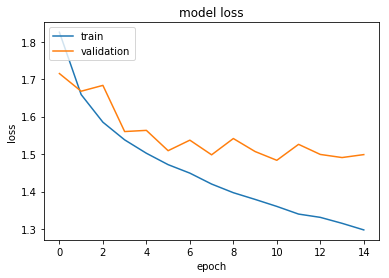

In [8]:
plotLosses(history)

#### Evaluating the MLP

To get a measure of our model's performance we need to evaluate it using the test samples:

In [10]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [11]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4772221557617187, 0.4843]


## 2. CNN classifier

So far, we have not exploited that we are working with images. By using [Convolutional Neural Networks](http://cs231n.github.io/convolutional-networks/), we can take advantage of the special structure of 
the inputs. Convolutions are [translation invariant](https://stats.stackexchange.com/questions/208936/what-is-translation-invariance-in-computer-vision-and-convolutional-netral-netwo), and this makes them especially well suited for processing images.

#### Preparing the dataset

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


#### Creating CNN model

We will use two convolutional layers, each with 32 filters a kernel size of (3,3) and ReLU activation function.

In [14]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

#### Training the CNN

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 33s - loss: 1.5275 - acc: 0.4491 - val_loss: 1.2096 - val_acc: 0.5683
Epoch 2/15
 - 10s - loss: 1.1028 - acc: 0.6083 - val_loss: 1.0479 - val_acc: 0.6279
Epoch 3/15
 - 10s - loss: 0.8646 - acc: 0.6955 - val_loss: 0.9887 - val_acc: 0.6576
Epoch 4/15
 - 10s - loss: 0.6581 - acc: 0.7693 - val_loss: 1.0504 - val_acc: 0.6546
Epoch 5/15
 - 10s - loss: 0.4743 - acc: 0.8340 - val_loss: 1.1388 - val_acc: 0.6513
Epoch 6/15
 - 10s - loss: 0.3055 - acc: 0.8952 - val_loss: 1.3371 - val_acc: 0.6535
Epoch 7/15
 - 10s - loss: 0.2110 - acc: 0.9264 - val_loss: 1.5708 - val_acc: 0.6468
Epoch 8/15
 - 10s - loss: 0.1535 - acc: 0.9484 - val_loss: 1.7149 - val_acc: 0.6510
Epoch 9/15
 - 10s - loss: 0.1306 - acc: 0.9569 - val_loss: 1.8674 - val_acc: 0.6388
Epoch 10/15
 - 10s - loss: 0.1131 - acc: 0.9626 - val_loss: 1.9473 - val_acc: 0.6494
Epoch 11/15
 - 10s - loss: 0.0900 - acc: 0.9698 - val_loss: 2.2104 - val_acc: 0.6499
Epoch 12/15
 - 10s - los

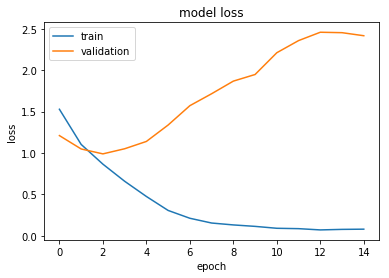

In [16]:
plotLosses(history)

#### Evaluating the CNN

In [17]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [18]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[2.500901676940918, 0.6457]


As we can see, the CNN reached significantly higher accuracy than the MLP classifier, but overfitting occured during the training of our model. To avoid this, the use of some [regularization techniques](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/) would be advised. 

## 3. Regularization

In most cases, larger models have a tendency to overfit training data. While getting good performance on the training set, they will perform poorly on the test set. Regularization methods are used to prevent overfitting, making these larger models generalize better.

### 3.1 Dropout

[Dropout](https://arxiv.org/abs/1207.0580) works on a neural network layer by masking a random subset of its outputs (zeroing them) for every input with probability `p` and scaling up the rest of the outputs by `1/(1 - p)`.

Dropout is normally used during training. Masking prevents gradient backpropagation through the masked outputs. The method thus selects a random subset of the neural network to train on any particular example. This can be thought of as training a model ensemble to solve the task, with the individual models sharing parameters.

At test time, `p` is set to zero. This can be interpreted as averaging the outputs of the ensemble models. Because of the scaling, the expected layer outputs are the same during training and testing.

In [19]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

#### Training the CNN which now contains dropout layers

In [20]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 13s - loss: 1.7196 - acc: 0.3707 - val_loss: 1.4212 - val_acc: 0.4857
Epoch 2/15
 - 11s - loss: 1.3874 - acc: 0.5000 - val_loss: 1.2307 - val_acc: 0.5568
Epoch 3/15
 - 11s - loss: 1.2296 - acc: 0.5615 - val_loss: 1.1826 - val_acc: 0.5888
Epoch 4/15
 - 11s - loss: 1.1268 - acc: 0.6029 - val_loss: 1.0526 - val_acc: 0.6353
Epoch 5/15
 - 11s - loss: 1.0476 - acc: 0.6274 - val_loss: 1.0252 - val_acc: 0.6423
Epoch 6/15
 - 11s - loss: 0.9697 - acc: 0.6617 - val_loss: 1.0035 - val_acc: 0.6500
Epoch 7/15
 - 11s - loss: 0.8979 - acc: 0.6815 - val_loss: 0.9850 - val_acc: 0.6560
Epoch 8/15
 - 11s - loss: 0.8476 - acc: 0.7010 - val_loss: 1.0023 - val_acc: 0.6490
Epoch 9/15
 - 11s - loss: 0.7937 - acc: 0.7180 - val_loss: 0.9915 - val_acc: 0.6653
Epoch 10/15
 - 11s - loss: 0.7459 - acc: 0.7340 - val_loss: 0.9725 - val_acc: 0.6742
Epoch 11/15
 - 11s - loss: 0.7105 - acc: 0.7481 - val_loss: 0.9770 - val_acc: 0.6744
Epoch 12/15
 - 11s - los

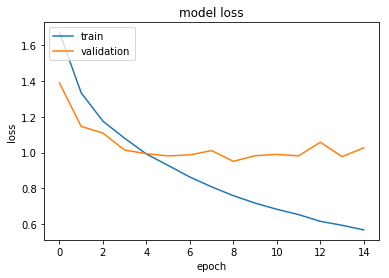

In [26]:
plotLosses(history)

### 3.2 Batch normalization

[Batch Normalization](https://arxiv.org/abs/1502.03167) works by normalizing layer outputs to a running mean and variance. This speeds up training and improves the final performance of the model. The running statistics are fixed at test time.

While batch normalization works as a regularizer, it also benefits smaller models.

In [21]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [22]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 16s - loss: 1.6012 - acc: 0.4324 - val_loss: 1.2655 - val_acc: 0.5333
Epoch 2/15
 - 15s - loss: 1.2542 - acc: 0.5550 - val_loss: 1.1303 - val_acc: 0.5969
Epoch 3/15
 - 14s - loss: 1.1074 - acc: 0.6073 - val_loss: 1.0324 - val_acc: 0.6322
Epoch 4/15
 - 14s - loss: 1.0025 - acc: 0.6449 - val_loss: 0.9621 - val_acc: 0.6626
Epoch 5/15
 - 14s - loss: 0.9354 - acc: 0.6711 - val_loss: 0.9224 - val_acc: 0.6717
Epoch 6/15
 - 15s - loss: 0.8808 - acc: 0.6875 - val_loss: 0.9085 - val_acc: 0.6829
Epoch 7/15
 - 14s - loss: 0.8300 - acc: 0.7024 - val_loss: 1.1020 - val_acc: 0.6225
Epoch 8/15
 - 14s - loss: 0.7796 - acc: 0.7234 - val_loss: 0.8956 - val_acc: 0.6890
Epoch 9/15
 - 14s - loss: 0.7440 - acc: 0.7349 - val_loss: 0.8996 - val_acc: 0.6907
Epoch 10/15
 - 14s - loss: 0.7102 - acc: 0.7470 - val_loss: 0.9567 - val_acc: 0.6760
Epoch 11/15
 - 15s - loss: 0.6813 - acc: 0.7577 - val_loss: 0.8423 - val_acc: 0.7081
Epoch 12/15
 - 14s - los

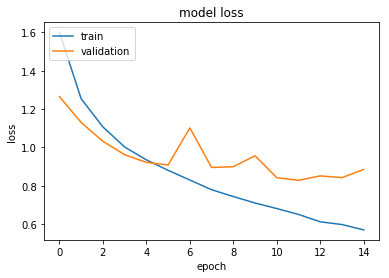

In [23]:
plotLosses(history)

#### Evaluating the CNN (with dropout and batch normalization)

In [24]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [25]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.9001454822540284, 0.6958]


### 3.3 Data Augmentation

In [45]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [46]:
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [47]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[40000:]) / 32,
                    steps_per_epoch=len(X_train[:40000]) / 32,
                    epochs=15,
                    verbose=2)

Epoch 1/15
 - 22s - loss: 1.6077 - acc: 0.4339 - val_loss: 1.3149 - val_acc: 0.5389
Epoch 2/15
 - 22s - loss: 1.2702 - acc: 0.5459 - val_loss: 1.0530 - val_acc: 0.6322
Epoch 3/15
 - 22s - loss: 1.1561 - acc: 0.5896 - val_loss: 0.9933 - val_acc: 0.6535
Epoch 4/15
 - 21s - loss: 1.1022 - acc: 0.6102 - val_loss: 1.1616 - val_acc: 0.6080
Epoch 5/15
 - 21s - loss: 1.0641 - acc: 0.6221 - val_loss: 1.0029 - val_acc: 0.6513
Epoch 6/15
 - 21s - loss: 1.0402 - acc: 0.6350 - val_loss: 0.8972 - val_acc: 0.6834
Epoch 7/15
 - 21s - loss: 1.0110 - acc: 0.6468 - val_loss: 0.8085 - val_acc: 0.7182
Epoch 8/15
 - 21s - loss: 0.9917 - acc: 0.6510 - val_loss: 0.9505 - val_acc: 0.6710
Epoch 9/15
 - 21s - loss: 0.9638 - acc: 0.6640 - val_loss: 0.8966 - val_acc: 0.6890
Epoch 10/15
 - 21s - loss: 0.9430 - acc: 0.6699 - val_loss: 0.9033 - val_acc: 0.6828
Epoch 11/15
 - 21s - loss: 0.9389 - acc: 0.6711 - val_loss: 0.8320 - val_acc: 0.7082
Epoch 12/15
 - 21s - loss: 0.9242 - acc: 0.6745 - val_loss: 1.1632 - val_a

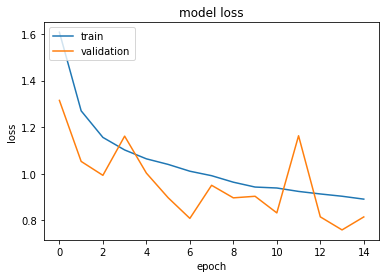

In [48]:
plotLosses(history)

#### Evaluating the CNN (with dropout, batch normalization and data augmentation)

In [49]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [50]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.82181376247406, 0.7154]


####  Training example with small dataset (1000 images)
To demonstrate the usefulness of data augmentation, let's see what happens if we only train with 1000 images instead of 50000.

The learning process without image augmentation: <br>

![no_aug](images/no_augmentation.png)

<br>


<br>

The learning process with image augmentation: <br>

![aug](images/with_augmentation.png)

<br>


The following part of the tutorial is based on [Magnus Erik Hvass Pedersen's](http://www.hvass-labs.org/) work which can be found on [Github](https://github.com/Hvass-Labs/TensorFlow-Tutorials).

## 4. Transfer learning

It is common practice to use pretrained networks in image processing, since large datasets are relatively uncommon, the training of a large network requires significant resources and it usually takes a long time (e.g. modern networks take 2-3 weeks to train across multiple GPUs on ImageNet, which contains 1.2 million images with 1000 categories). <br>

#### Inception V3

The [Inception model](https://arxiv.org/abs/1512.00567) is a pretrained network for the [ImageNet](http://image-net.org/) challenge, released by Google. The namesake of the network are the Inception modules, which are basically smaller models inside the bigger model. The same architecture was used in the GoogLeNet model, which was a state of the art image recognition model in 2014.

First, lets preview our classification process of CIFAR-10!
Since the Inception model is enormous compared to the networks we have worked with so far, it would take too much time to train the whole network. The trick is to add new classification layers to it, and train only those.
While we do not have to actually train the Inception model, we do need to generate output for the CIFAR-10 dataset, which is quite tedious by itself. The output of a single image is going to be a 2048 dimension vector, illustrated below as 'Transfer-Values Saved in Cache'. After we generate this output vector for all the images, we can feed them to a simple classification network.

![title](images/inception.png)

#### Loading the dataset

While the CIFAR-10 dataset is easily accessible in keras, these 32x32 pixel images cannot be fed as the input of the Inceptionv3 model as they are too small. For the sake of simplicity we will use an other library to load and upscale the images, then calculate the output of the Inceptionv3 model for the CIFAR-10 images as seen above.

In [51]:
from download_data.data_downloader import maybe_download_and_extract

url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "data/"
maybe_download_and_extract(url, download_dir)

Data has apparently already been downloaded and unpacked.


We need to reshape the images to have the 32x32x3 data structure.

In [52]:
from load_data.data_loader import load_data
import numpy as np

dataset = load_data(download_dir)
dataset['images_train'] = np.reshape(dataset['images_train'], (-1, 3, 32, 32))
dataset['images_train'] = np.transpose(dataset['images_train'], (0,2,3,1))
dataset['images_test'] = np.reshape(dataset['images_test'], (-1, 3, 32, 32))
dataset['images_test'] = np.transpose(dataset['images_test'], (0,2,3,1))

from keras.utils.np_utils import to_categorical   

categorical_labels = to_categorical(dataset['labels_train'], num_classes=10)
categorical_test_labels = to_categorical(dataset['labels_test'], num_classes=10)


#### Loading the model

In [53]:
from inception import inception

inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [54]:
model = inception.Inception()

#### Classification with the Inception V3
Before we do anything with the model, let's try to classify an image with it. <br>
This image is of a tram (or speedcar) and it has the desired input shape of the Inception model: (299, 299, 3).

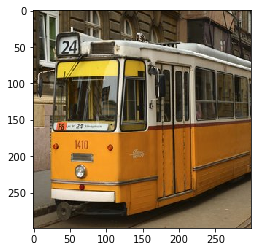

(299, 299, 3)

In [55]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

img = mpimg.imread("images/tram.jpg")
plt.imshow(img)
plt.show()
img.shape

After generating the prediction, we use the print_scores function to display the top k (5 in this case) predictions of the model.

In [56]:
prediction = model.classify(image = img)
model.print_scores(pred = prediction, k=5)

91.55% : streetcar
 1.76% : trolleybus
 0.10% : electric locomotive
 0.07% : passenger car
 0.05% : beer glass


####  Generating Inception V3 outputs

As mentioned before, we need to generate the output of the Inception model for every CIFAR-10 image as 2048-dimension vectors.

In [57]:
import os

# Setting up file paths to save the generated output

output_path = "inception/"
inception_train_output_path = os.path.join(output_path, 'inception_cifar10_train.pkl')
inception_test_output_path = os.path.join(output_path, 'inception_cifar10_test.pkl')

In [58]:
from inception.inception import transfer_values_cache

# The transfer_values_cache function is used to generate the Inception outputs from the dataset images.

print("Generating Inception output for train images...")

inception_train_output = transfer_values_cache(cache_path=inception_train_output_path,
                                              images=dataset['images_train'],
                                              model=model)

print("Generating Inception output for test images...")

inception_test_output = transfer_values_cache(cache_path=inception_test_output_path,
                                             images=dataset['images_test'],
                                             model=model)

Generating Inception output for train images...
- Data loaded from cache-file: inception/inception_cifar10_train.pkl
Generating Inception output for test images...
- Data loaded from cache-file: inception/inception_cifar10_test.pkl


In [59]:
model.close()

Inception input image: 


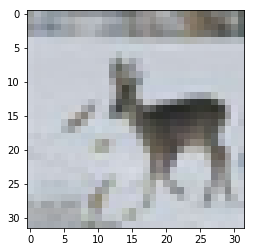

Inception output: 


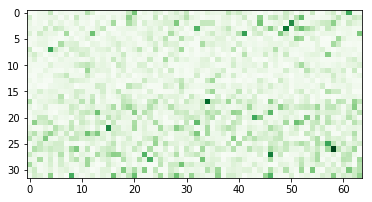

In [60]:
print("Inception input image: ")
plt.imshow(dataset['images_train'][20]/255)
plt.show()
print("Inception output: ")
plt.imshow(inception_train_output[20].reshape((32,64)), cmap='Greens')
plt.show()

#### Creating the classifier

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=inception_train_output.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = Adam(lr=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
history = model.fit(inception_train_output,categorical_labels, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.4670 - acc: 0.8456 - val_loss: 0.3342 - val_acc: 0.8870
Epoch 2/10
 - 10s - loss: 0.3454 - acc: 0.8842 - val_loss: 0.3518 - val_acc: 0.8813
Epoch 3/10
 - 8s - loss: 0.3089 - acc: 0.8947 - val_loss: 0.3266 - val_acc: 0.8924
Epoch 4/10
 - 9s - loss: 0.2832 - acc: 0.9027 - val_loss: 0.3387 - val_acc: 0.8902
Epoch 5/10
 - 9s - loss: 0.2609 - acc: 0.9105 - val_loss: 0.3017 - val_acc: 0.8969
Epoch 6/10
 - 10s - loss: 0.2375 - acc: 0.9168 - val_loss: 0.3430 - val_acc: 0.8888
Epoch 7/10
 - 10s - loss: 0.2214 - acc: 0.9201 - val_loss: 0.3035 - val_acc: 0.9007
Epoch 8/10
 - 10s - loss: 0.2042 - acc: 0.9282 - val_loss: 0.3180 - val_acc: 0.8977
Epoch 9/10
 - 10s - loss: 0.1903 - acc: 0.9315 - val_loss: 0.3137 - val_acc: 0.9008
Epoch 10/10
 - 10s - loss: 0.1716 - acc: 0.9395 - val_loss: 0.3561 - val_acc: 0.8956


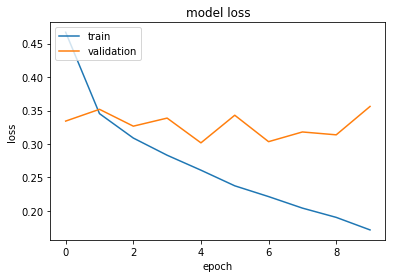

In [65]:
plotLosses(history)

In [67]:
score = model.evaluate(inception_test_output, categorical_test_labels, batch_size=128, verbose=0)

In [68]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.359534766960144, 0.895]


## 5.  Ensemble

The ensemble method is a technique to create several models combine them to produce improved prediction results. <br>
There are several ways to combine these models. We could determine the combined prediction by calculating a mean of the prediction, or we could use a vote system: the label which get more vote wins. <br>
In this example, we will simply calculate the average of the predictions. <br>

#### Saving predictions for the test dataset

The following function saves the predictions of the test set as a file.

In [69]:
import os
def savePredictions(model):
    predictions = model.predict(inception_test_output, batch_size=32, verbose=0)

    save_dir = 'predictions/'
    i = 0
    while os.path.exists(os.path.join(save_dir, "predictions_%s.npy" % i)):
        i += 1
    np.save(os.path.join(save_dir, "predictions_%s.npy" % i), predictions)


When we have collected all predictions, we need a function to calculate the mean of these predictions, and evaluate its accuracy.

In [70]:
def calculate_ensemble_accuracy(all_predictions):
    all_predictions = np.array(all_predictions)
    ensemble_predictions = np.mean(all_predictions, axis = 0)
    ensemble_class_predictions = np.argmax(ensemble_predictions, axis=1)
    ensemble_accuracy = np.sum((ensemble_class_predictions == dataset['labels_test'])) / len(dataset['labels_test'])
    return ensemble_accuracy

With this function, we can monitor the change of the ensemble's accuracy as we add more models to it.

In [71]:
import glob
import matplotlib.pyplot as plt

def evaluate_ensemble():
    load_dir = 'predictions/'
    all_predictions = []
    current_accuracy = []
    ensemble_num = 0
    for filename in sorted(glob.glob(os.path.join(load_dir, '*.npy'))):
        predictions = np.load(filename)
        all_predictions.append(predictions)
        ensemble_num += 1
        current_accuracy.append(calculate_ensemble_accuracy(all_predictions)) 
    ensemble_accuracy = calculate_ensemble_accuracy(all_predictions)
    print('Ensemble accuracy: ' , ensemble_accuracy)
    print('Number of networks in the ensemble: ', ensemble_num)
    plt.figure(figsize=(7,8))
    plt.plot(range(1,len(current_accuracy)+1),current_accuracy, linewidth=0.5, marker='o')
    plt.grid(linestyle='dotted')
    plt.xlabel('Network count', fontsize='large')
    plt.ylabel('Accuracy', fontsize='large')
    plt.show()

In [72]:
savePredictions(model)

Ensemble accuracy:  0.9039
Number of networks in the ensemble:  4


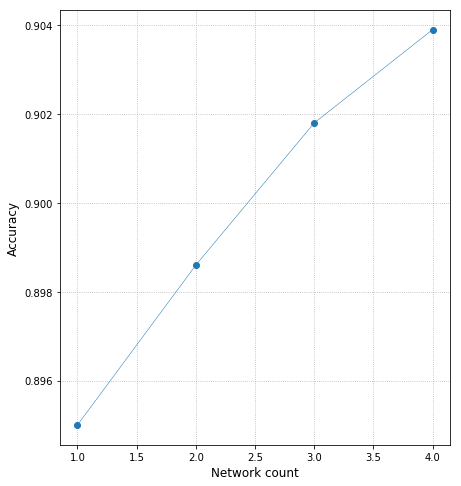

In [77]:
evaluate_ensemble()